In [1]:
import numpy as np
import pandas as pd
%config IPCompleter.use_jedi = False

In [2]:
data = pd.read_csv("./data/420_validation.csv", index_col=0)
data.head()

,query,first_category,cat_id,redirect
0,колготки,колготки и носки,3245756.0,1
1,40,киберпонедельник,3672618.0,-
2,бады,БАДы,3390215.0,1
3,бад,БАДы,3390215.0,1
4,для машины,для посудомоечной машины,3245766.0,1


In [3]:
data['redirect'].unique()

array(['1', '-', '0'], dtype=object)

In [6]:
d = {'0': 0, '1': 1}
data = data[data['redirect'] != '-']
data['redirect'] = data['redirect'].map(d)

In [7]:
data['redirect'].unique()

array([1, 0])

In [8]:
data['cat_id'].isna().sum()

7

In [9]:
data[data['cat_id'].isna()]

,query,first_category,cat_id,redirect
5,basi,"Armand Basi, Angel Schlesser",NaN,1
33,viktor,"Viktor & Rolf, Atelier Cologne, MAISON MARGIELA",NaN,1
36,для женщин,для женщин,NaN,1
55,rolf,"Viktor & Rolf, Atelier Cologne, MAISON MARGIELA",NaN,1
79,rabanne,"Carolina Herrera, Paco Rabanne",NaN,1
139,calvin klein calvin klein,"Hugo Boss, Gucci, Calvin Klein",NaN,1
145,sebastian,Sebastian и Seb man,NaN,1


In [10]:
data

,query,first_category,cat_id,redirect
0,колготки,колготки и носки,3245756.0,1
2,бады,БАДы,3390215.0,1
3,бад,БАДы,3390215.0,1
4,для машины,для посудомоечной машины,3245766.0,1
5,basi,"Armand Basi, Angel Schlesser",NaN,1
...,...,...,...,...
243,колготки 20 den,колготки и носки,3245756.0,0
244,маска для лица mixit,маски,873249.0,0
245,маска для лица aha,маски,873249.0,0
246,тушь для ресниц кабаре,тушь для ресниц,873823.0,0


In [11]:
data.columns = ['query', 'category_name', 'category_id', 'is_redirect']
data = data[~data['category_id'].isna()]

In [12]:
data.isna().sum()

query            0
category_name    0
category_id      0
is_redirect      0
dtype: int64

In [13]:
data.to_csv("validation_data.csv", index=False)

### Проверка tfidf-бейзлайна

In [6]:
import pandas as pd
from pipeline.training import load_pipeline, score_pipeline
%config IPCompleter.use_jedi = False

pipe = load_pipeline("./models/tfidf_baseline1")
data = pd.read_csv("validation_data.csv")

In [7]:
res = score_pipeline(pipe, data, data['is_redirect'])
res

0.731845238095238

In [8]:
from sklearn.metrics import f1_score
pred = pipe.predict(data)
res = f1_score(pred, data['is_redirect'])
res

0.5540540540540541

In [9]:
from collections import Counter
Counter(pred)

Counter({0: 184, 1: 52})

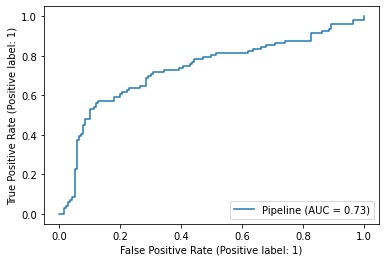

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
%matplotlib inline

p = plot_roc_curve(pipe, data, data['is_redirect'])
plt.show()